In [1]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
site = "https://www.google.com/search?q=data+scientist+jobs"

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   data scientist jobs - Google Search
  </title>
  <script nonce="">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'aDyMZu6nBZqd4-EPuKKTkAU',kEXPI:'31',kBL:'vWSJ',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-IN';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&
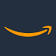
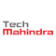
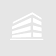
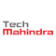
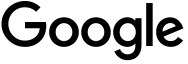

In [3]:
driver = webdriver.Firefox()
driver.get(site)
time.sleep(3)
soup = BeautifulSoup(driver.page_source,"html.parser")
print(soup.prettify())
driver.close()

In [4]:
results = soup.find(class_='esVihe')

In [5]:
a = results.get('href')
print(a)

https://www.google.com/search?q=data+scientist+jobs&ibp=htl;jobs&sa=X&ved=2ahUKEwju--yllZiHAxWazjgGHTjRBFIQudcGKAF6BAgmECg


<html lang="en-IN">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   data scientist jobs
  </title>
  <script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.iZZZ0XsR8bM.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/am=AAAQ/rs=AHpOoo_0-97nH_2IxP0suYF105-PdJv4zg/cb=gapi.loaded_0">
  </script>
  <script nonce="">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'fTyMZub-Jaqs4-EPiPSwgAg',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-IN';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m
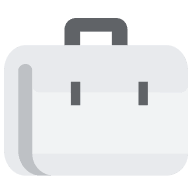
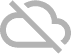

In [6]:
driver = webdriver.Firefox()
driver.get(a)
time.sleep(3)
soup = BeautifulSoup(driver.page_source,"html.parser")
print(soup.prettify())


<html lang="en-IN">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   data scientist jobs
  </title>
  <script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.iZZZ0XsR8bM.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/am=AAAQ/rs=AHpOoo_0-97nH_2IxP0suYF105-PdJv4zg/cb=gapi.loaded_0">
  </script>
  <script nonce="">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'fTyMZub-Jaqs4-EPiPSwgAg',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-IN';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m
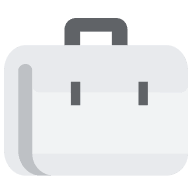
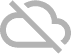

In [7]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
elem = driver.find_element(By.TAG_NAME, "body")
no_of_pagedowns = 30

while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(3)
    no_of_pagedowns-=1

soup = BeautifulSoup(driver.page_source,"html.parser")
print(soup.prettify())
driver.close()

In [11]:
#results = soup.find_all('ul')

In [18]:
list_data = []
for ul in soup.find_all('ul'):
    for li in ul.find_all('li'):
        #URL
        URL = li.find('div', class_ = 'KGjGe')
        if URL == None or list_data == []:
            URL = a
            pass
        else:
            URL = URL['data-share-url']
            print(URL)

        jobtitle = li.find('div', class_ = 'BjJfJf PUpOsf')
        if jobtitle == None:
            pass
        else:
            jobtitle = jobtitle.text
            print(jobtitle)
        
        company = li.find('div', class_ = 'vNEEBe')
        if company == None:
            pass
        else:
            company = company.text
            print(company)

        location = li.find('div', class_ = 'Qk80Jf')
        if location == None:
            pass
        else:
            location = location.text.strip()
            print(location)

        job_posted = li.find('span', class_ = 'LL4CDc')
        if job_posted == None:
            pass
        else:
            job_posted = job_posted.text
            print(job_posted)

        employment_type = li.find_all('span', class_ = 'LL4CDc')
        if employment_type == None:
            pass
        else:
            employment_type = employment_type['aria-label'!="Employment type Full–time"].text
            print(employment_type)
        list_data.append(['Google',URL,jobtitle,company,location,job_posted,employment_type])

df=pd.DataFrame(list_data, columns=['SOURCE','URL','TITLE','COMPANY','LOCATION','POSTED','EMPLOYMENT_TYPE'])

Data Scientist II, Global Data Analytics (FinOps)
ADCI HYD 13 SEZ
Hyderabad, Telangana
16 days ago
Full–time
https://www.google.com/search?ibp=htl;jobs&q=data+scientist+jobs&htidocid=MPC9FWNyTpi4_5E-AAAAAA%3D%3D&hl=en-IN&kgs=bb9db9236af8f53e&shndl=-1&source=sh/x/im/textlists/detail/m1/1&ibp=htl;jobs&htidocid=2Mh5oC_xnX1V-YJXAAAAAA%3D%3D#fpstate=tldetail&htivrt=jobs&htiq=data+scientist+jobs&htidocid=2Mh5oC_xnX1V-YJXAAAAAA%3D%3D
Data Scientist
Tech Mahindra (formerly Mahindra Satyam)
Hyderabad, Telangana
18 days ago
Full–time
https://www.google.com/search?ibp=htl;jobs&q=data+scientist+jobs&htidocid=MPC9FWNyTpi4_5E-AAAAAA%3D%3D&hl=en-IN&kgs=bb9db9236af8f53e&shndl=-1&source=sh/x/im/textlists/detail/m1/1&ibp=htl;jobs&htidocid=2Mh5oC_xnX1V-YJXAAAAAA%3D%3D&ibp=htl;jobs&htidocid=VjaE5s79VPoM_8L2AAAAAA%3D%3D#fpstate=tldetail&htivrt=jobs&htiq=data+scientist+jobs&htidocid=VjaE5s79VPoM_8L2AAAAAA%3D%3D
Data Scientist
www.couponcrown.com
Hyderabad, Telangana
Full–time
Full–time
https://www.google.co

In [19]:
df

SOURCE                                                URL  \
0   Google  https://www.google.com/search?q=data+scientist...   
1   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
2   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
3   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
4   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
5   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
6   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
7   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
8   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
9   Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
10  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
11  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
12  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
13  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
14  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
15  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
16  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
17  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
18  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   
19  Google  https://www.google.com/search?ibp=htl;jobs&q=d...   

                                                TITLE  \
0   Data Scientist II, Global Data Analytics (FinOps)   
1                                      Data Scientist   
2                                      Data Scientist   
3                           Machine Learning Engineer   
4                                      Data Scientist   
5                               Senior Data Scientist   
6                         Data Science Senior Manager   
7                         Data Scientist Associate Sr   
8   S&C Global Network - AI - Hi Tech - Data Scien...   
9          Data Scientist – Computational Multi-Omics   
10                                     Data Scientist   
11     Business Intelligence Engineer / Data Engineer   
12                   Data Analyst Advisor [T500-7444]   
13                    Payroll - Data Analyst, Payroll   
14                        Data Scientist/Data Analyst   
15                                       Data Science   
16                                     Data Scientist   
17                                     Data Scientist   
18                                     Data Scientist   
19                                  DATA SCIENTIST II   

                                     COMPANY  \
0                            ADCI HYD 13 SEZ   
1   Tech Mahindra (formerly Mahindra Satyam)   
2                        www.couponcrown.com   
3                                      Apple   
4                         TechnoSphere, Inc.   
5                          ARAA IT Solutions   
6                  Flutter Entertainment Plc   
7                               Confidential   
8                                  Accenture   
9                                    Corteva   
10                          Veniso Solutions   
11                                    Amazon   
12                             FedEx Express   
13                                    Amazon   
14                                   Siemens   
15                           Infosys Limited   
16                                       PTL   
17                             IGT Solutions   
18                             Smart Working   
19                           TE Connectivity   

                            LOCATION          POSTED EMPLOYMENT_TYPE  
0               Hyderabad, Telangana     16 days ago       Full–time  
1               Hyderabad, Telangana     18 days ago       Full–time  
2               Hyderabad, Telangana       Full–time       Full–time  
3               Hyderabad, Telangana      8 days ago       Full–time  
4               Hyderabad, Telangana       Full–time       Full–time  
5    